# PUFF Plotting

In [1]:
import pandas as pd
import pygmt as pygmt

In [2]:
df = pd.read_excel('/Users/bell/ecoraid/2021/CTDcasts/dy2103/logs/DY2103_PUFF_Deployments.xlsx',sheet_name=0)

In [3]:
df

,PUFF #,Lat.,,Lon.,,Site,Latitude,Longitude
0,7,61,4.1900,177.0,46.3800,15.0,61.069833,-177.773000
1,4,59,41.4000,176.0,42.3000,11.0,59.690000,-176.705000
2,1,58,59.5900,175.0,0.1600,10.0,58.993167,-175.002667
3,6,56,42.2600,171.0,13.1700,6.0,56.704333,-171.219500
4,8,59,14.6397,169.0,25.0989,16.0,59.243995,-169.418315
5,9,60,46.7300,174.0,29.8400,14.0,60.778833,-174.497333
6,2,55,26.5200,163.0,44.4100,2.0,55.442000,-163.740167
7,10,55,14.1500,166.0,7.7900,3.0,55.235833,-166.129833
8,5,56,26.8300,168.0,29.7700,5.0,56.447167,-168.496167
9,3,NOT DEPLOYED - DAMAGED,NaN,NaN,NaN,NaN,NaN,NaN


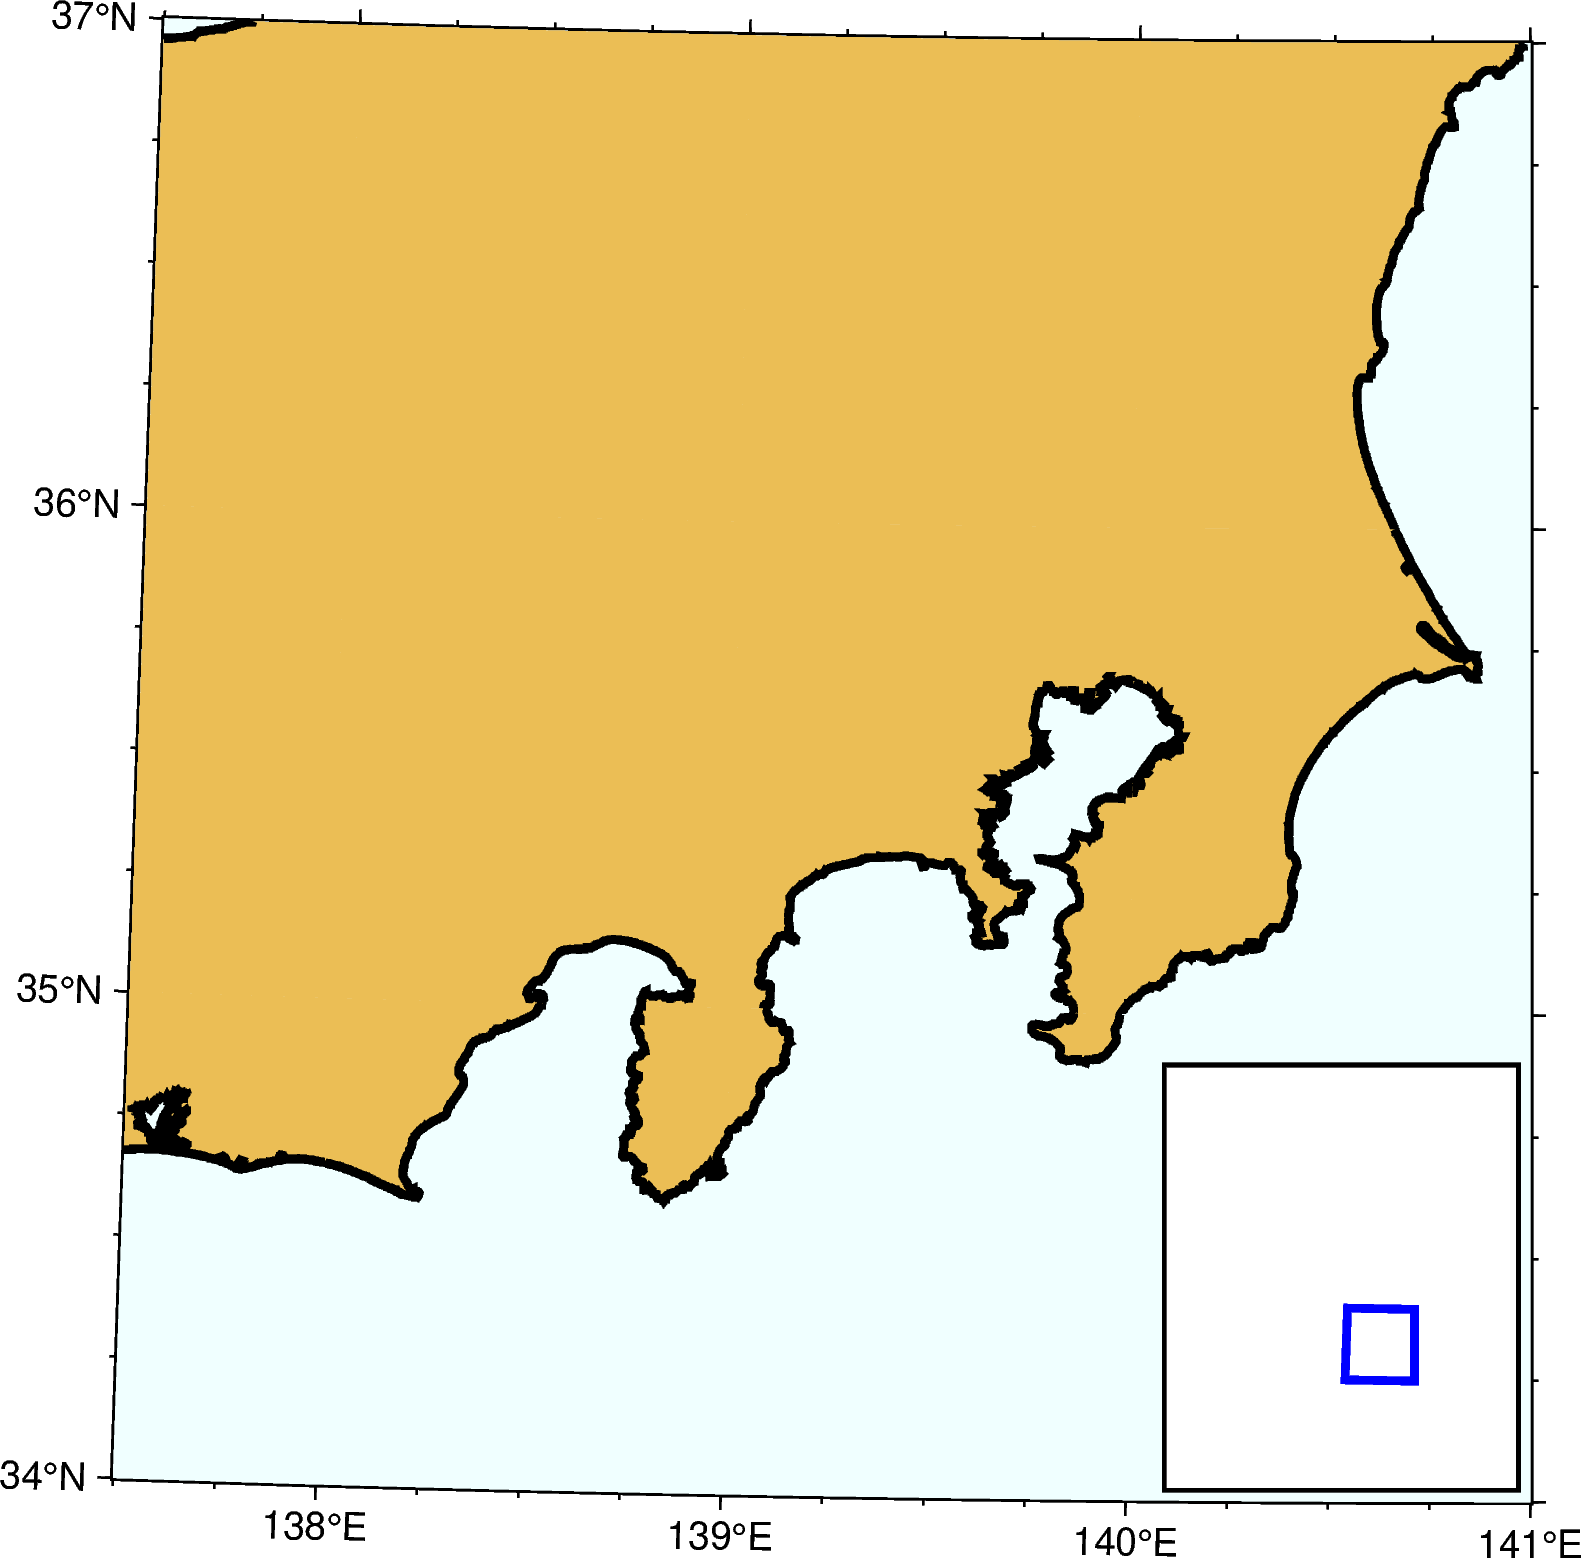

In [7]:
import pygmt

# Set the region of the main figure
region = [137.5, 141, 34, 37]

fig = pygmt.Figure()

# Plot the base map of the main figure. Universal Transverse Mercator (UTM) projection
# is used and the UTM zone is set to be "54S".
fig.basemap(region=region, projection="U54S/12c", frame=["WSne", "af"])

# Set the land color to "lightbrown", the water color to "azure1", the shoreline
# width to "2p", and the area threshold to 1000 km^2 for the main figure
fig.coast(land="lightbrown", water="azure1", shorelines="2p", area_thresh=1000)

# Create an inset map, setting the position to bottom right, the width to
# 3 cm, the height to 3.6 cm, and the x- and y-offsets to
# 0.1 cm, respectively. Draws a rectangular box around the inset with a fill color
# of "white" and a pen of "1p".
with fig.inset(position="jBR+w3c/3.6c+o0.1c", box="+gwhite+p1p"):
    # Plot the Japan main land in the inset using coast. "U54S/?" means UTM
    # projection with map width automatically determined from the inset width.
    # Highlight the Japan area in "lightbrown"
    # and draw its outline with a pen of "0.2p".
    fig.coast(
        region=[129, 146, 30, 46],
        projection="U54S/?",
        dcw="JP+glightbrown+p0.2p",
        area_thresh=10000,
    )
    # Plot a rectangle ("r") in the inset map to show the area of the main figure.
    # "+s" means that the first two columns are the longitude and latitude of
    # the bottom left corner of the rectangle, and the last two columns the
    # longitude and latitude of the uppper right corner.
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="2p,blue")

fig.show()

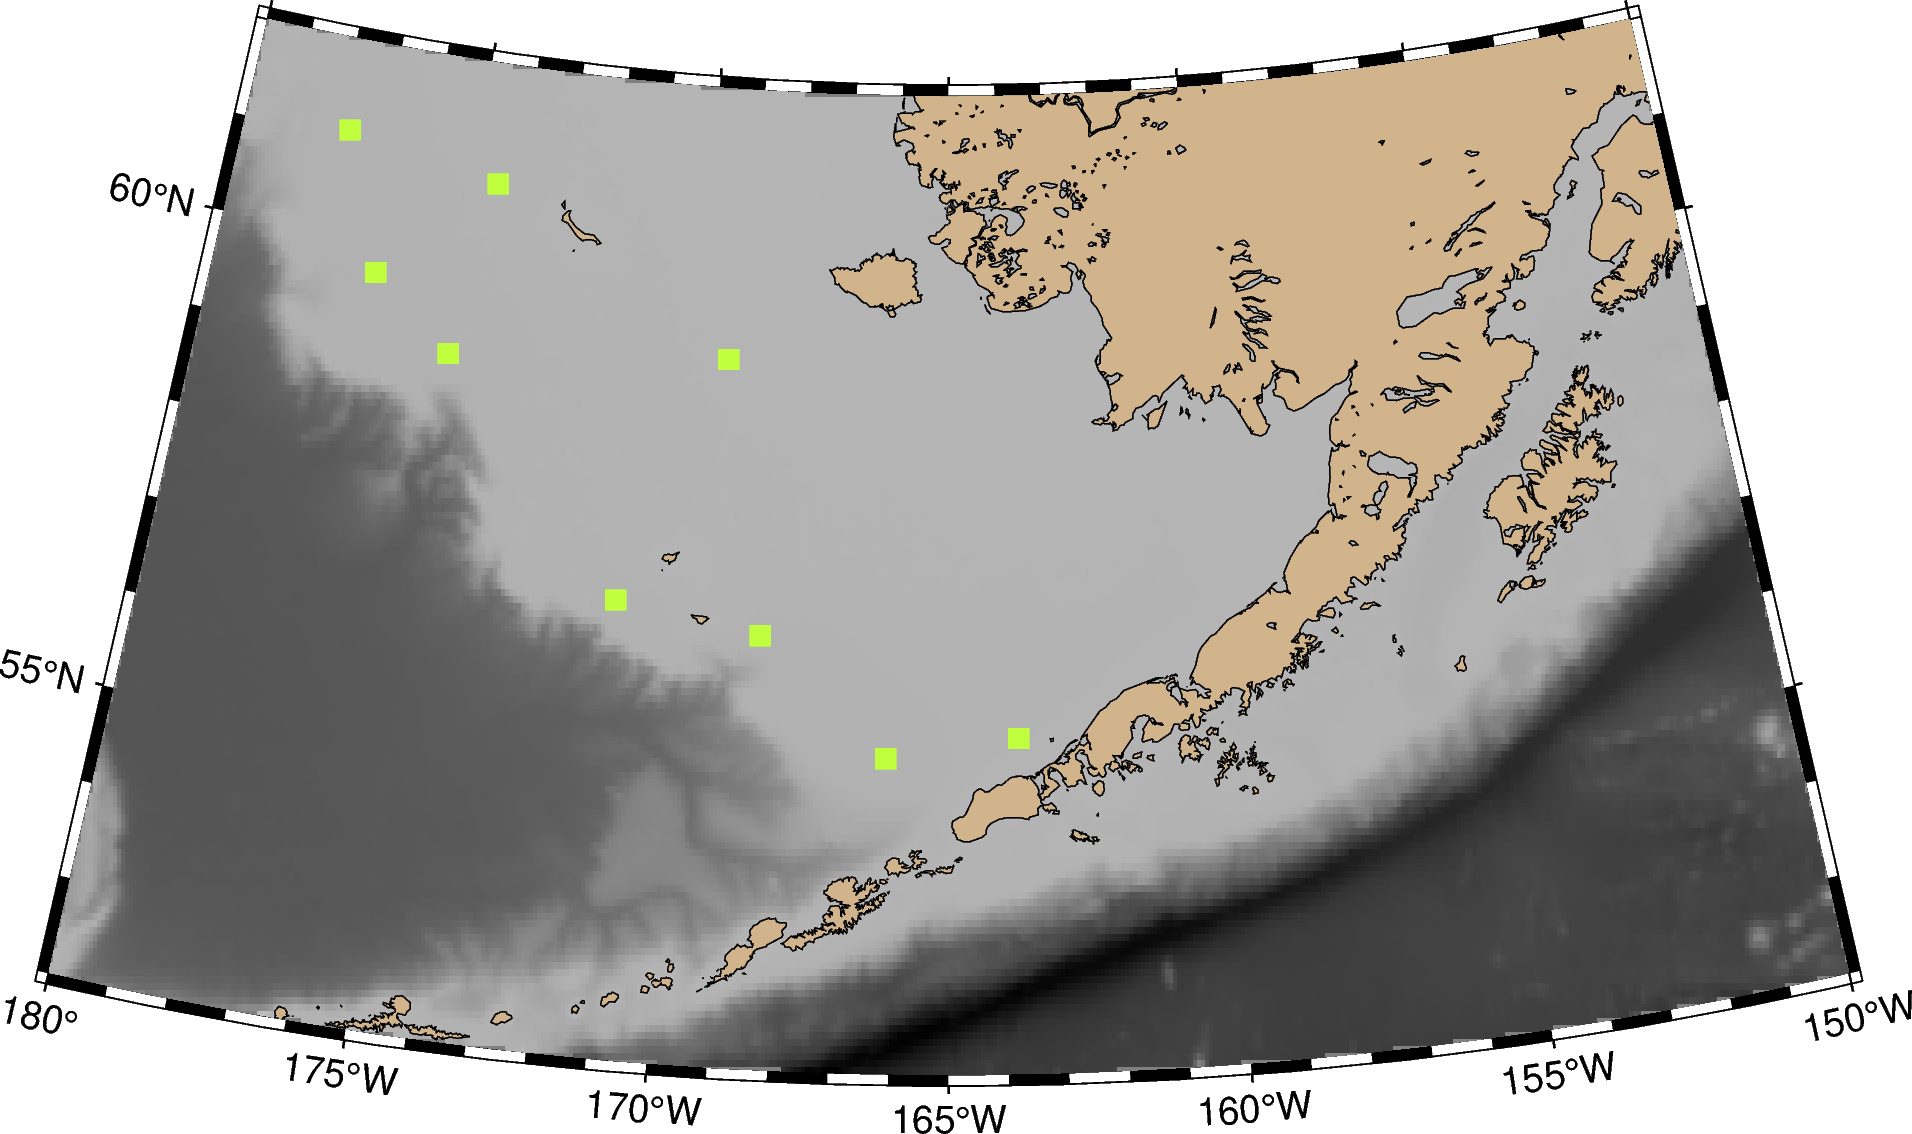

In [5]:
extent = [-180, -150, 52, 62]
#if extent is -179 or -180 this will fail
#if resolution is 05m, this will segfault?
grid = pygmt.datasets.load_earth_relief(region=extent, resolution='04m')

fig = pygmt.Figure()
fig.basemap(region=extent, projection='B-165/65/55/65/6i', frame=True)
fig.grdimage(grid=grid, cmap="gray")
fig.coast(shorelines=True, land='tan')
#fig.plot(df.Longitude, df.Latitude, pen="1.5p,green")
fig.plot(df.Longitude, df.Latitude, color='olivedrab1', style='s.25')

fig.show()

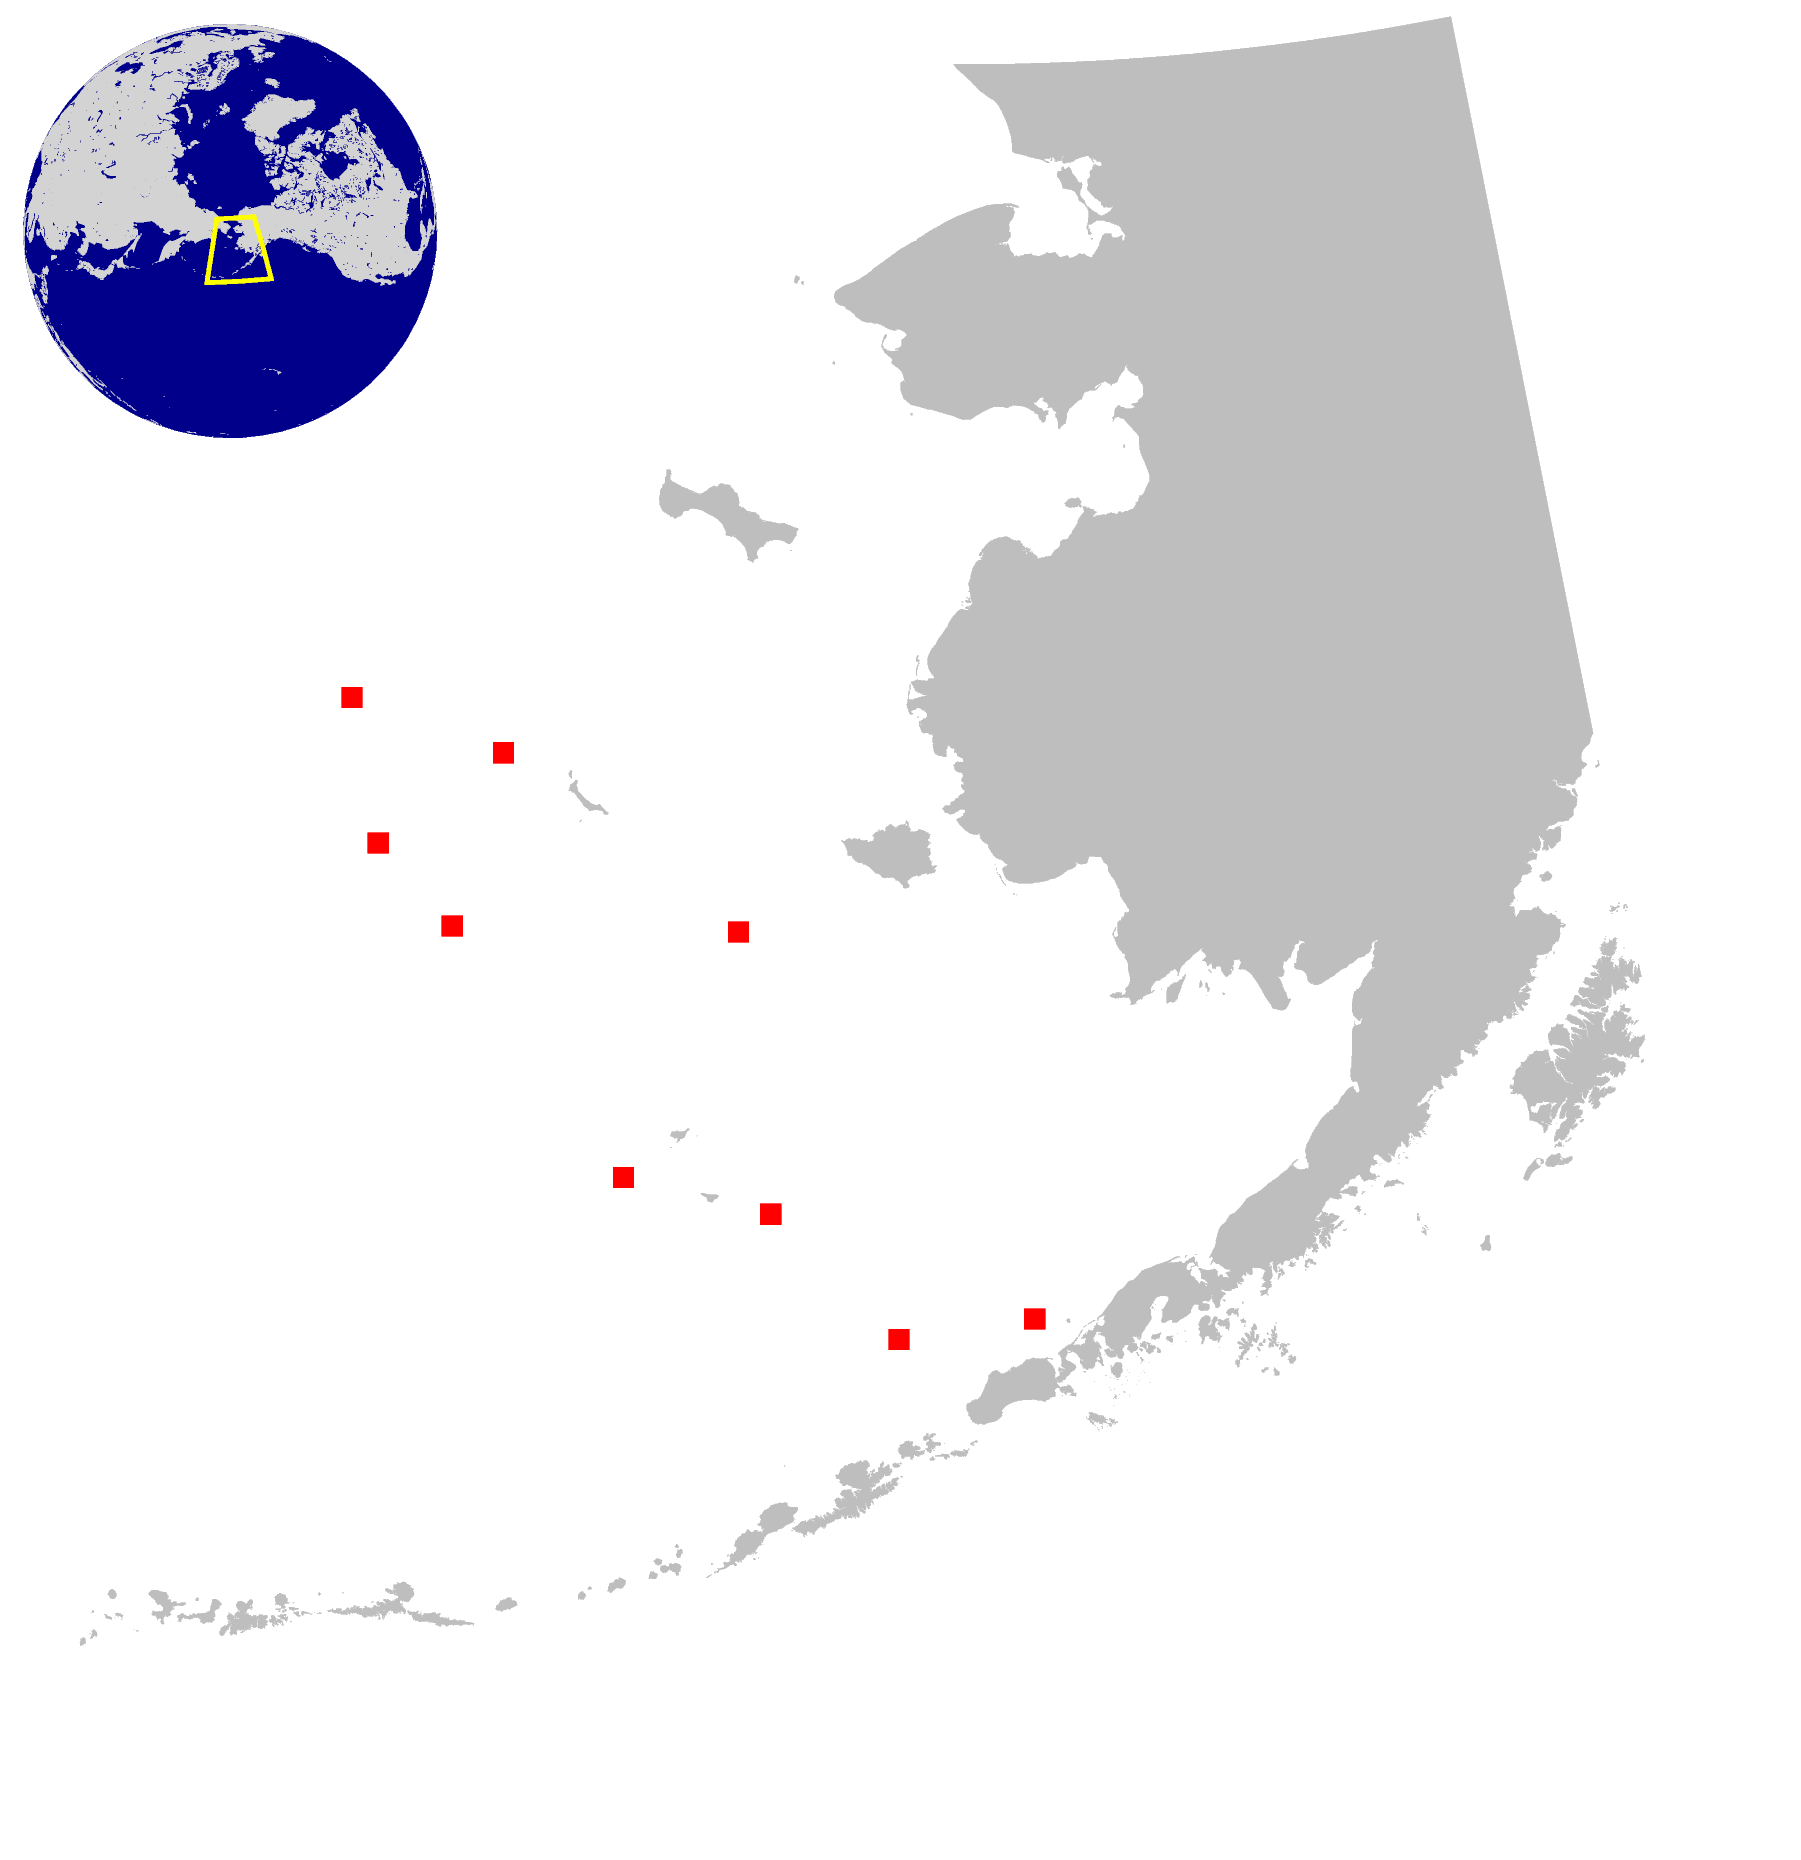

In [23]:

extent = [-180, -152, 50, 68]

fig = pygmt.Figure()
# Create the primary figure, setting the region to Madagascar, the land color to
# "brown", the water to "lightblue", the shorelines width to "thin", and adding a frame
fig.coast(region=extent, land="white", water="white", projection='B-165/65/55/65/6i', dcw="US+ggrey",
)
# Create an inset, setting the position to top left, the width to 3.5 centimeters, and
# the x- and y-offsets to 0.2 centimeters
# . The margin is set to 0, and the border is "gold"
# with a pen size of 1.5p.
with fig.inset(position="jTL+w3.5c+o0.2c", margin=0, ):
    # Create a figure in the inset using coast. This example uses the azimuthal
    # orthogonal projection centered at 47E, 20S. The land color is set to "gray" and
    # Madagascar is highlighted in "red3".
    fig.coast(
        region="g",
        projection="G-170/65/3.5c",
        land="lightgray",
        water="darkblue",
    )

    rectangle = [[extent[0], extent[2], extent[1], extent[3]]]
    fig.plot(data=rectangle, style="r+s", pen="1p,yellow")
fig.plot(df.Longitude, df.Latitude, color='red', style='s.25')

fig.show()